# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [14]:
businessUnderstanding = """From data perspective, the task is to develop a predictive modeling framework to identify and quantify the key features that influence used car prices. This involves formulating a supervised regression problem where the target variable is the car price, and the input features may include attributes such as year, manufacturer, model, condition, cylinders, fuel, odometer,  title status, region etc. The objective is to use exploratory data analysis (EDA), feature engineering, and model training to identify the most impactful variables and accurately predict used car prices."""

print(businessUnderstanding)

From data perspective, the task is to develop a predictive modeling framework to identify and quantify the key features that influence used car prices. This involves formulating a supervised regression problem where the target variable is the car price, and the input features may include attributes such as year, manufacturer, model, condition, cylinders, fuel, odometer,  title status, region etc. The objective is to use exploratory data analysis (EDA), feature engineering, and model training to identify the most impactful variables and accurately predict used car prices.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


from sklearn import set_config
set_config(display="diagram")

df = pd.read_csv('data/vehicles.csv')

df.info()
df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


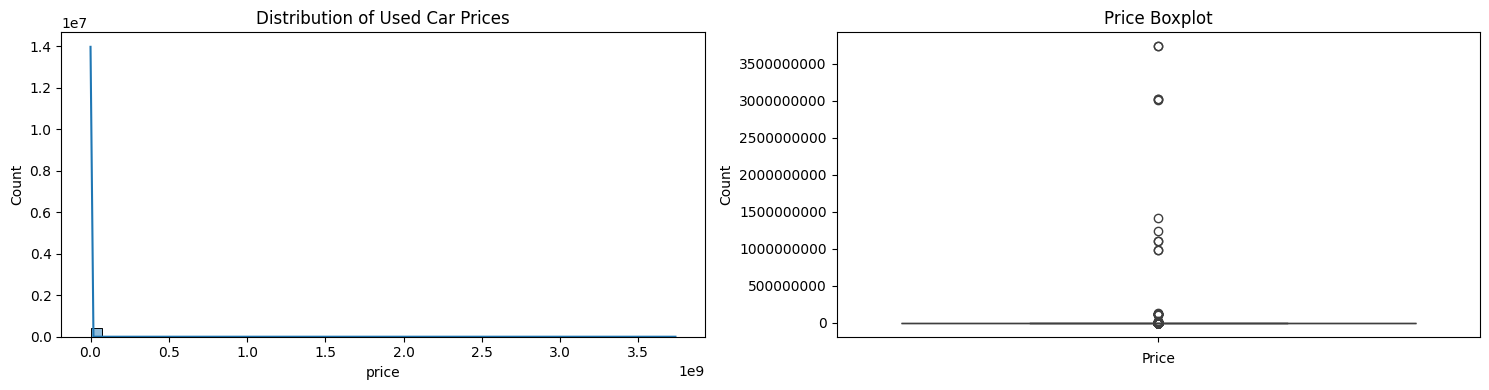

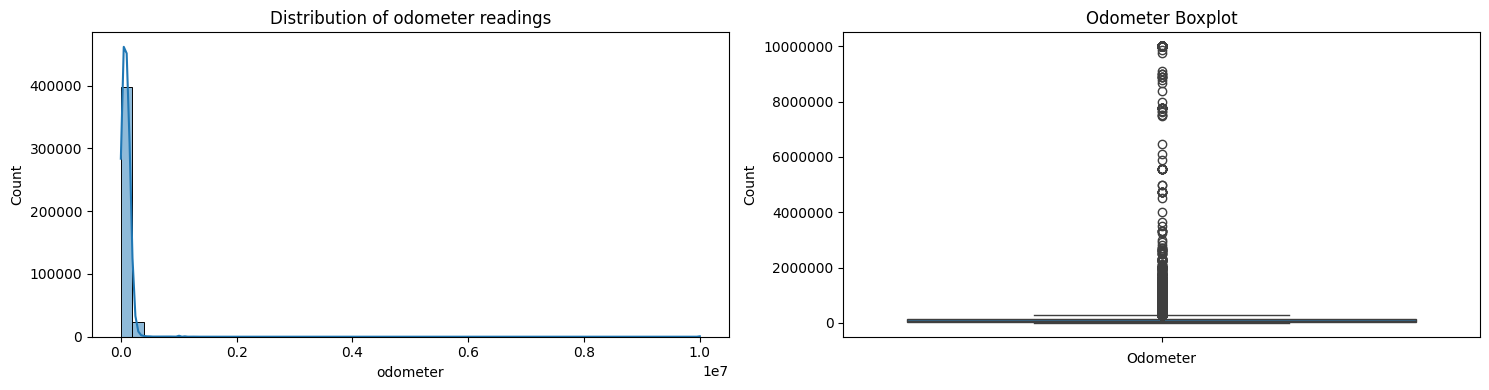

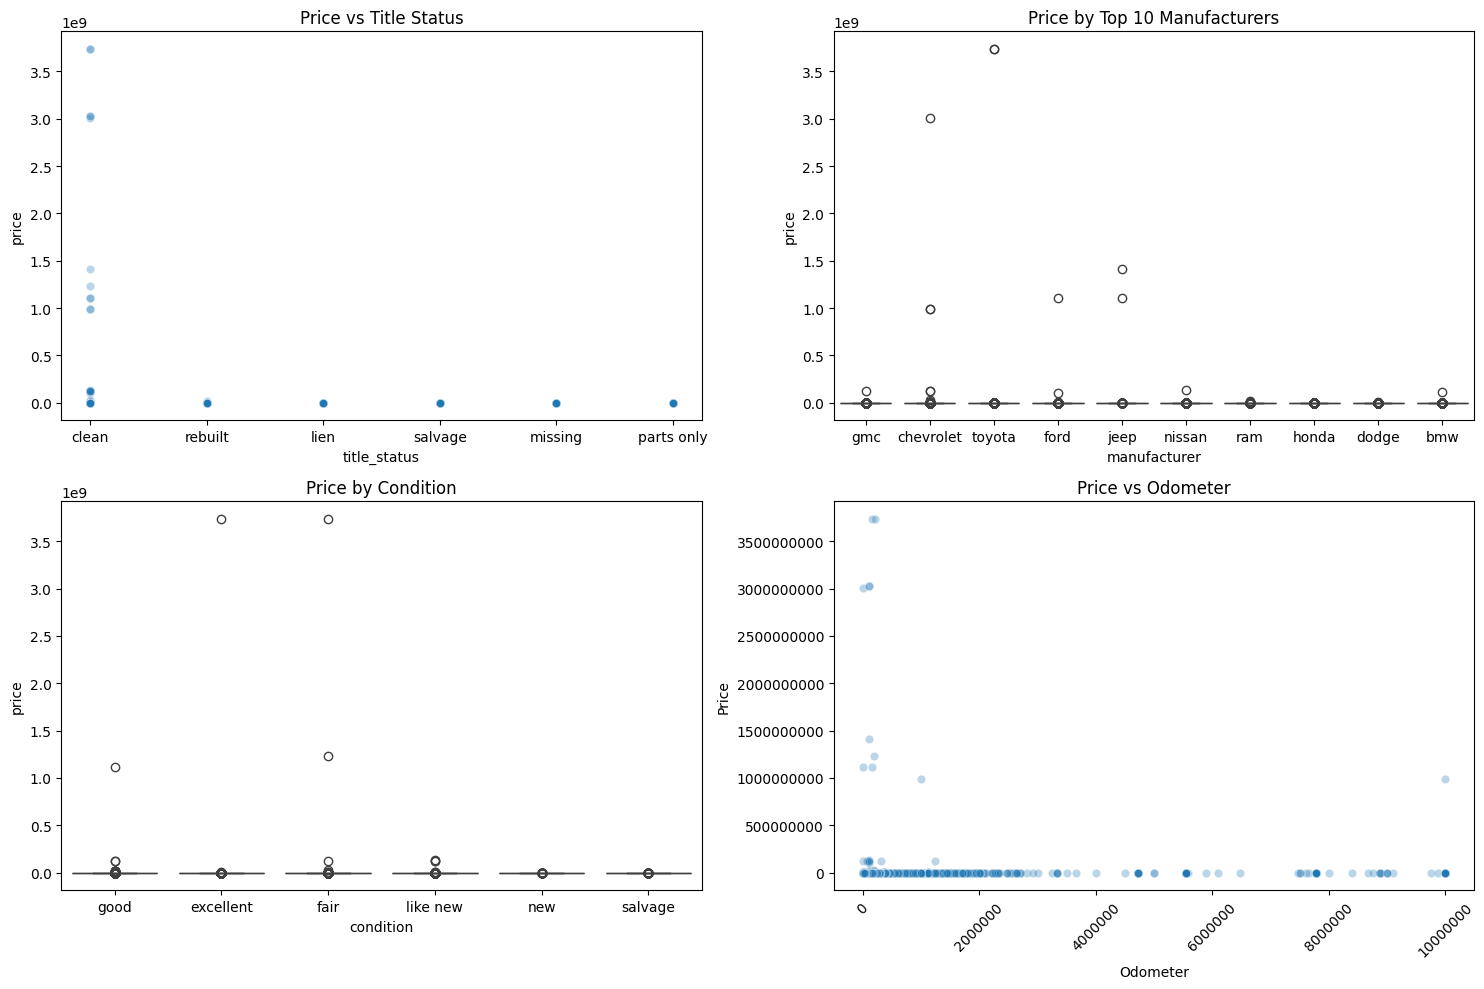

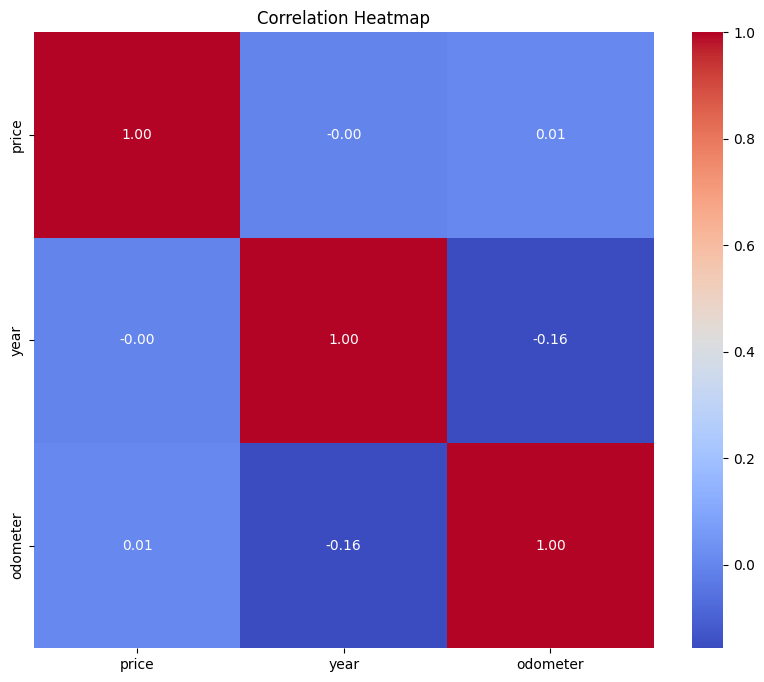

In [16]:


fig, axes = plt.subplots(1,2, figsize=(15, 4))
# --- 1. Distribution of Price ---
sns.histplot(df['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
axes[1].ticklabel_format(style='plain')

sns.boxplot(y='price', data=df, ax=axes[1])
axes[1].set_title('Price Boxplot')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize=(15, 4))
# --- 1. Distribution of Odometer Readings ---
sns.histplot(df['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of odometer readings')
plt.ticklabel_format(style='plain')
plt.xlabel('Odometer')
plt.ylabel('Count')
axes[1].ticklabel_format(style='plain')

sns.boxplot(y='odometer', data=df, ax=axes[1])
axes[1].set_title('Odometer Boxplot')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2,2, figsize=(15, 10))
# --- 2. Price vs Title Status ---
sns.scatterplot(x='title_status', y='price', data=df, alpha=0.3, ax=axes[0,0])
axes[0,0].set_title('Price vs Title Status')
plt.xlabel('Title Status')
plt.ylabel('Price')

# --- 3. Price by Manufacturer (Top 10) ---
top_makes = df['manufacturer'].value_counts().head(10).index
sns.boxplot(x='manufacturer', y='price', data=df[df['manufacturer'].isin(top_makes)], ax=axes[0,1])
axes[0,1].set_title('Price by Top 10 Manufacturers')
plt.xticks(rotation=45)

# --- 4. Price by Condition ---
sns.boxplot(x='condition', y='price', data=df, ax=axes[1,0])
axes[1,0].set_title('Price by Condition')

# --- 5. Price vs Odometer ---
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.3, ax=axes[1,1])
axes[1,1].set_title('Price vs Odometer')
plt.ticklabel_format(style='plain')
plt.xlabel('Odometer')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# --- 6. Correlation Heatmap ---
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.drop('id', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
#Check for null values percentage in each column
null_percentages = (df.isnull().sum() / len(df)) * 100
print('% of null values in each column:')
print(null_percentages.sort_values(ascending=False))

% of null values in each column:
size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
region           0.000000
id               0.000000
price            0.000000
state            0.000000
dtype: float64


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [18]:
print('Original shape:', df.shape)

# Find and remove outliers in 'price' and 'odometer' using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers in 'price'
df_cleaned = remove_outliers(df, 'price')

# Remove outliers in 'odometer' (if column exists and is not all NaN)
if 'odometer' in df_cleaned.columns and df_cleaned['odometer'].notnull().any():
    df_cleaned = remove_outliers(df_cleaned, 'odometer')

# Drop columns having too many missing values or irrelevant
df_cleaned = df_cleaned.drop(columns=['id', 'VIN', 'state', 'size',  'region', 'model'], errors='ignore')

# Fill missing values
object_columns = df.select_dtypes(include='object')

for column in object_columns.columns:
    if object_columns[column].nunique() < 100:  # Only print columns with fewer than 100 unique values
      print(f"Column: {column}, Unique Values: {object_columns[column].unique()}")

df_cleaned.fillna({'cylenders':'other', 'condition':'fair', 'fuel':'other','transmission':'other', 'manufacturer': 'unknown', 'type': 'other', 'paint_color': 'other', 'title_status': 'unknown',  'drive': 'unknown', 'year': df['year'].median(), 'odometer': df['odometer'].median()}, inplace=True)

df_cleaned = df_cleaned.dropna()
print((df_cleaned.isnull().sum() / len(df_cleaned)) * 100)
print('Cleaned shape:', df_cleaned.shape)


Original shape: (426880, 18)
Column: manufacturer, Unique Values: [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
Column: condition, Unique Values: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
Column: cylinders, Unique Values: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
Column: fuel, Unique Values: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
Column: title_status, Unique Values: [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
Column: transmission, Unique Values: [nan 'other' 'automatic' 'manual']
Column: drive, Unique Values: 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [19]:
X = df_cleaned.drop(columns=['price'], axis=1)
y = df_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Encode categorical variables
#['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status','transmission', 'drive', 'type', 'paint_color']
col_transformer = make_column_transformer(
                                        (OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'), df_cleaned.select_dtypes(include='object').columns,), 
                                         remainder= StandardScaler()
                                         )


In [20]:

# Create a pipeline with preprocessing and Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('linreg', LinearRegression())
])

#Unable to run the below pipeline due to processing power constraints. 
# pipeline = Pipeline([('preprocessor', col_transformer),
#      ('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
#                                 ('selector', SelectFromModel(Lasso())),
#                                     ('linreg', LinearRegression())])

pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
print(f"Training Score: {train_score}")

test_score = pipeline.score(X_test, y_test)
print(f"Test Score: {test_score}")

mean_squared_error_train = mean_squared_error(y_train, pipeline.predict(X_train))
print(f"Mean Squared Error on Training Set: {mean_squared_error_train}") 
  
mean_squared_error_test = mean_squared_error(y_test, pipeline.predict(X_test))
print(f"Mean Squared Error on Test Set: {mean_squared_error_test}")

reg_df = pd.DataFrame({'feature': pipeline.named_steps['preprocessor'].get_feature_names_out(), 'coef': pipeline.named_steps['linreg'].coef_})
selected_features = reg_df.loc[reg_df['coef'] != 0].sort_values(by='coef', key=np.abs, ascending=False)
selected_features['feature'].apply(lambda x: x.split('__')[1])


Training Score: 0.4760574590324992
Test Score: 0.48109875109124123
Mean Squared Error on Training Set: 86823177.32651417
Mean Squared Error on Test Set: 85831893.879571


30       manufacturer_morgan
38        manufacturer_tesla
11      manufacturer_ferrari
50    cylinders_12 cylinders
12         manufacturer_fiat
               ...          
66      title_status_rebuilt
58             fuel_electric
16        manufacturer_honda
90          paint_color_blue
98           paint_color_red
Name: feature, Length: 104, dtype: object

In [21]:
# Create a pipeline with preprocessing and Lasso regression
pipeline = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('lasso', Lasso(random_state = 42))
])
pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
print(f"Training Score: {train_score}")

test_score = pipeline.score(X_test, y_test)
print(f"Test Score: {test_score}")

mean_squared_error_train = mean_squared_error(y_train, pipeline.predict(X_train))
print(f"Mean Squared Error on Training Set: {mean_squared_error_train}") 
  
mean_squared_error_test = mean_squared_error(y_test, pipeline.predict(X_test))
print(f"Mean Squared Error on Test Set: {mean_squared_error_test}")

lasso_df = pd.DataFrame({'feature': pipeline.named_steps['preprocessor'].get_feature_names_out(), 'coef': pipeline.named_steps['lasso'].coef_})
selected_features = lasso_df.loc[lasso_df['coef'] != 0].sort_values(by='coef', key=np.abs, ascending=False)
selected_features['feature'].apply(lambda x: x.split('__')[1])

Training Score: 0.4758266926280603
Test Score: 0.4808309952042782
Mean Squared Error on Training Set: 86861417.9175847
Mean Squared Error on Test Set: 85876183.60699752


38        manufacturer_tesla
33      manufacturer_porsche
57               fuel_diesel
56           cylinders_other
51     cylinders_3 cylinders
               ...          
5         manufacturer_buick
101       paint_color_yellow
75             drive_unknown
54     cylinders_6 cylinders
43       condition_excellent
Name: feature, Length: 90, dtype: object

In [22]:
# Hyperparameter tuning using GridSearchCV
param_grid = { 
    'lasso__alpha': [0.01, 0.1, 1, 10],
    'lasso__max_iter': [1000, 1500, 2000]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters from GridSearchCV:", grid_search.best_params_)
best_pipeline = grid_search.best_estimator_

best_train_score = best_pipeline.score(X_train, y_train)
print(f"Best Training Score: {best_train_score}")

best_test_score = best_pipeline.score(X_test, y_test)
print(f"Best Test Score: {best_test_score}")

best_mean_squared_error_train = mean_squared_error(y_train, best_pipeline.predict(X_train))
print(f"Best Mean Squared Error on Training Set: {best_mean_squared_error_train}")

best_mean_squared_error_test = mean_squared_error(y_test, best_pipeline.predict(X_test))
print(f"Best Mean Squared Error on Test Set: {best_mean_squared_error_test}")



Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025254967414.8652, tolerance: 3193719923.7315574
  model = cd_fast.sparse_enet_coordinate_descent(


Best parameters from GridSearchCV: {'lasso__alpha': 0.1, 'lasso__max_iter': 1000}
Best Training Score: 0.4760400767333167
Best Test Score: 0.4810951619690953
Best Mean Squared Error on Training Set: 86826057.76917012
Best Mean Squared Error on Test Set: 85832487.55929679


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

                     feature          coef
38        manufacturer_tesla  13691.206005
30       manufacturer_morgan  13446.874018
11      manufacturer_ferrari  -9225.207193
33      manufacturer_porsche   7267.787021
9        manufacturer_datsun   6663.190221
56           cylinders_other  -6629.553786
57               fuel_diesel   6496.732045
51     cylinders_3 cylinders  -6489.009697
1    manufacturer_alfa-romeo   6012.776384
12         manufacturer_fiat  -5061.439335
103                 odometer  -5009.378219
50    cylinders_12 cylinders   4995.224472
63         title_status_lien   4362.263641
52     cylinders_4 cylinders  -3892.641407
77                  type_bus  -3815.636168
65   title_status_parts only  -3795.623644
35        manufacturer_rover   3621.669084
27      manufacturer_mercury  -3593.337717
53     cylinders_5 cylinders  -3529.047451
69    transmission_automatic  -3353.948422


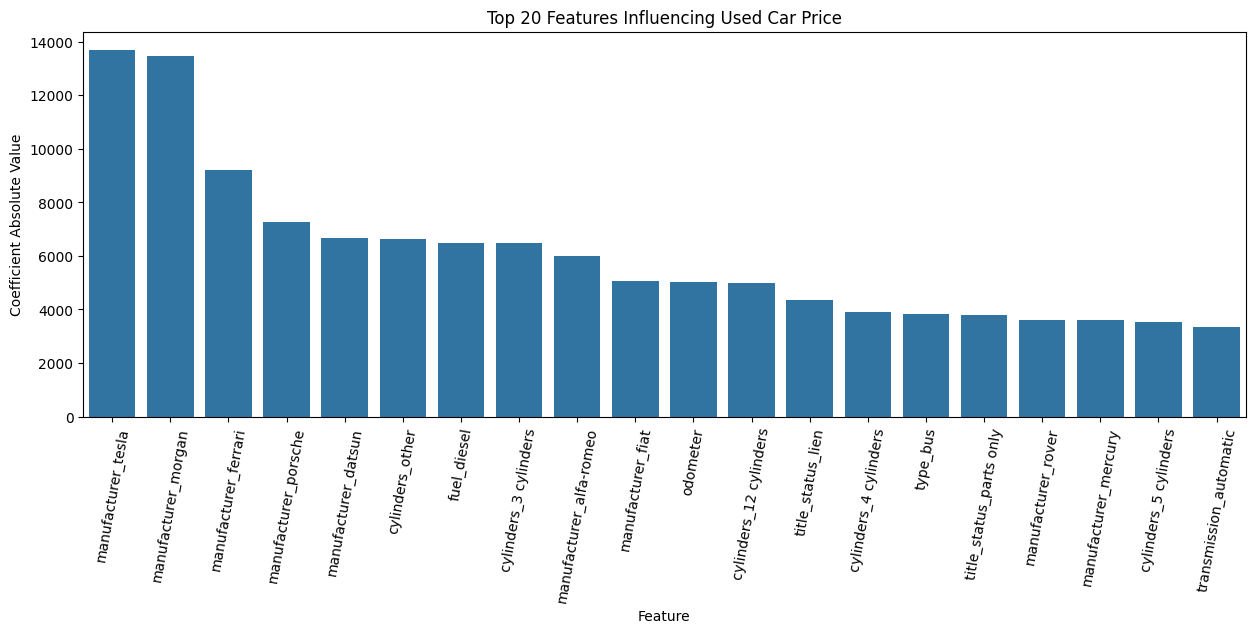

In [23]:
# Feature importance from the best model
best_lasso_df = pd.DataFrame({'feature': best_pipeline.named_steps['preprocessor'].get_feature_names_out(), 'coef': best_pipeline.named_steps['lasso'].coef_})
top_features = best_lasso_df.loc[best_lasso_df['coef'] != 0].sort_values(by='coef', key=np.abs, ascending=False).head(20)
top_features['feature'] = top_features['feature'].apply(lambda x: x.split('__')[1])

print(top_features)

# Plot
plt.figure(figsize=(15, 5))
sns.barplot(x=top_features['feature'], y=top_features['coef'].abs())
plt.title('Top 20 Features Influencing Used Car Price')
plt.xticks(rotation=80)
plt.xlabel('Feature')
plt.ylabel('Coefficient Absolute Value')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [24]:
print("""Based on the analysis, features such as **manufacturer**, **cylenders**, **odometer**, **title status**, **type** and **transmission** play significant roles in determining a used car's price. This insight can guide dealerships to prioritize these attributes in listings and pricing algorithms.""")

Based on the analysis, features such as **manufacturer**, **cylenders**, **odometer**, **title status**, **type** and **transmission** play significant roles in determining a used car's price. This insight can guide dealerships to prioritize these attributes in listings and pricing algorithms.


In [25]:
print("""The Analysis assumes a linear relationship between different features and price. A non-linear analysis may capture more variance and produce better score""")

The Analysis assumes a linear relationship between different features and price. A non-linear analysis may capture more variance and produce better score
